In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
from scipy.constants import h

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
hbar = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, hbar, n, psi(x)

In [4]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))

In [5]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})

In [6]:
sol = sol.subs(k, n * sp.pi / a)

In [7]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

# Rozwiązanie

### Wyliczenie położenie

$$<x>=?$$
$$<x^2>=?$$
$$\sigma_X=?$$
$$\sigma_X^2=?$$

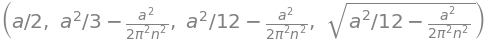

In [8]:
X=sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
X_squared=sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
sigma_X_squared=X_squared-X**2
sigma_X=sp.sqrt(sigma_X_squared)
X, X_squared, sigma_X_squared,sigma_X

### Wyliczenie pędu
$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P=?$$
$$\sigma_P^2=?$$

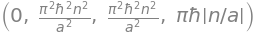

In [9]:
P=sp.integrate(sol.rhs*-hbar*sp.I*sol.rhs.diff(x),(x,0,a)).simplify()
P_squared=sp.integrate(sol.rhs * (sol.rhs).diff(x,x)*-hbar**2, (x, 0, a)).simplify()
sigma_P_squared=P_squared-P**2
sigma_P=sp.sqrt(sigma_P_squared).simplify()

P,P_squared,sigma_P_squared,sigma_P

### Sprawdzenie nierówności

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

In [10]:
check=sigma_P*sigma_X
check.simplify()

*Dla najmniejszego n: (n=1)*

In [11]:
res=h*sp.sqrt(3*sp.pi**2-18)/6
result=h/2

if(res.evalf()>=result):
    print('Spełnione')

res.evalf(),result

Spełnione


Po sprawdzeniu warunku dla najmniejszej wartości zasada nieoznaczoności jest spełniona.